In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '..')
from qoop.core.ansatz import chain_zxz_pennylane
import constant
%load_ext autoreload
%autoreload 2

In [31]:
import os

def remove_trailing_zeros(filename):
    # Split the filename into the name and extension
    name, ext = os.path.splitext(filename)

    # Identify the part of the filename containing the step size
    parts = name.split("stepsize")
    if len(parts) != 2:
        print("Filename does not contain 'stepsize' or has an unexpected format.")
        return filename

    prefix, stepsize_part = parts

    try:
        # Convert the stepsize part to a float and then back to a string to normalize it
        normalized_stepsize = f"{float(stepsize_part):.10g}"
    except ValueError:
        print("Invalid step size format in the filename.")
        return filename

    # Reassemble the filename
    new_name = f"{prefix}stepsize{normalized_stepsize}{ext}"
    return new_name
for filename in os.listdir("../data/loss"):
    if filename.endswith(".txt"):
        new_filename = remove_trailing_zeros(filename)
        if new_filename != filename:
            os.rename(f"../data/loss/{filename}", f"../data/loss/{new_filename}")
        print("Original filename:", filename)
        print("New filename:", new_filename)
        print()


Original filename: lossqaoa_4qubit_2layer_RAdamOptimizer_stepsize0.035.txt
New filename: lossqaoa_4qubit_2layer_RAdamOptimizer_stepsize0.035.txt

Original filename: lossqaoa_4qubit_2layer_NadamOptimizer_stepsize0.07500000000000001.txt
New filename: lossqaoa_4qubit_2layer_NadamOptimizer_stepsize0.075.txt

Filename does not contain 'stepsize' or has an unexpected format.
Original filename: lossdynamic_3qubit_2layer_AdamWOptimizer.txt
New filename: lossdynamic_3qubit_2layer_AdamWOptimizer.txt

Filename does not contain 'stepsize' or has an unexpected format.
Original filename: lossdynamic_3qubit_2layer_AMSGradOptimizer_t9.75.txt
New filename: lossdynamic_3qubit_2layer_AMSGradOptimizer_t9.75.txt

Filename does not contain 'stepsize' or has an unexpected format.
Original filename: lossdynamic_3qubit_2layer_AdamOptimizer_t0.75.txt
New filename: lossdynamic_3qubit_2layer_AdamOptimizer_t0.75.txt

Original filename: lossqaoa_4qubit_2layer_NadamOptimizer_stepsize0.035.txt
New filename: lossqaoa_

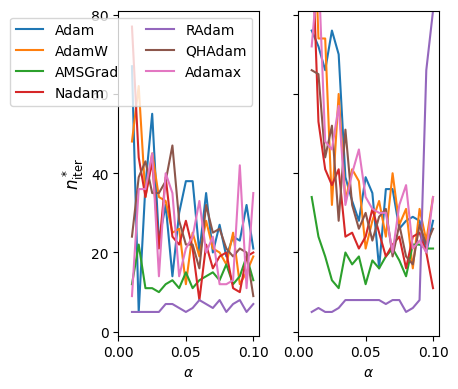

In [88]:

from qoop.core import optimizer_pennylane
import pennylane as qml
optimizers = [qml.AdamOptimizer, 
             optimizer_pennylane.AdamWOptimizer,
             optimizer_pennylane.AMSGradOptimizer,
             optimizer_pennylane.NadamOptimizer,
             optimizer_pennylane.RAdamOptimizer,
             optimizer_pennylane.QHAdamOptimizer,
             optimizer_pennylane.AdamaxOptimizer]


problems = [
    'VQE',
    'QAOA',
    'Dynamic simulation'
]
t = 0
step_sizes = np.linspace(0.01, 0.1, 19)
fig, ax = plt.subplots(1, 2, figsize=(4.5, 4))

# VQE
for j, optimizer in enumerate(optimizers):
    
    indices = []
    for i, stepsize in enumerate(step_sizes):
        # Load data
        loss = np.loadtxt(f'../data/loss/lossvqe_3qubit_2layer_{optimizer.__name__}_stepsize{np.round(stepsize, 5)}.txt')
        for point in range(5, len(loss)):
            if np.var(loss[point-5:point]) < 0.0001:
                index = point
                break
        indices.append(index)
    ax[0].plot(step_sizes, indices, label = optimizer.__name__[:-9])

ax[0].set_ylim(-1, 81)
ax[0].set_yticks([0, 20, 40, 60, 80])
ax[0].set_yticklabels([0, 20, 40, 60, 80])
ax[0].set_ylabel(r"$n_{\text{iter}}^*$", fontsize = 12)
ax[0].set_xticks([0, 0.05, 0.1])
ax[0].set_xlabel(r"$\alpha$")

# QAOA

for j, optimizer in enumerate(optimizers):
    
    indices = []
    for i, stepsize in enumerate(step_sizes):
        # Load data
        loss = np.loadtxt(f'../data/loss/lossqaoa_4qubit_2layer_{optimizer.__name__}_stepsize{np.round(stepsize, 5)}.txt')
        for point in range(5, len(loss)):
            if np.var(loss[point-5:point]) < 0.0001:
                index = point
                break
        indices.append(index)
    ax[1].plot(step_sizes, indices, label = optimizer.__name__[:-9])

ax[1].set_ylim(-1, 81)
ax[1].set_yticks([0, 20, 40, 60, 80])
ax[1].set_yticklabels([])
# ax[1].set_ylabel(r"$n_{\text{iter}}^*$", fontsize = 12)
ax[1].set_xticks([0, 0.05, 0.1])
ax[1].set_xlabel(r"$\alpha$")

# Dynamic simulation





ax[0].legend(ncol = 2)
# plt.legend(ncol = 5)
#plt.tight_layout()
plt.tight_layout()
#plt.savefig('../data/images/alpha.svg', bbox_inches='tight')
plt.show()

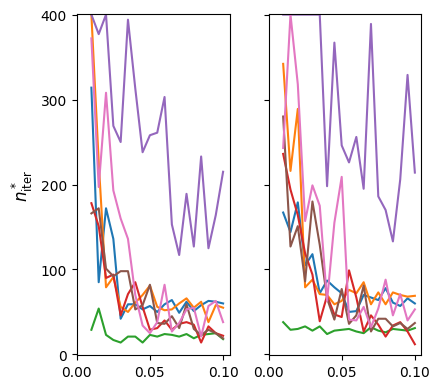

In [26]:

from qoop.core import optimizer_pennylane
import pennylane as qml
optimizers = [qml.AdamOptimizer, 
             optimizer_pennylane.AdamWOptimizer,
             optimizer_pennylane.AMSGradOptimizer,
             optimizer_pennylane.NadamOptimizer,
             optimizer_pennylane.RAdamOptimizer,
             optimizer_pennylane.QHAdamOptimizer,
             optimizer_pennylane.AdamaxOptimizer]


problems = [
    'VQE',
    'QAOA',
    'Dynamic simulation'
]
t = 0
step_sizes = np.linspace(0.01, 0.1, 19)
fig, ax = plt.subplots(1, 2, figsize=(4.5, 4))

# VQE
for j, optimizer in enumerate(optimizers):
    
    indices = []
    for i, stepsize in enumerate(step_sizes):
        # Load data
        loss = np.loadtxt(f'../data/loss/lossvqe_3qubit_2layer_{optimizer.__name__}_stepsize{np.round(stepsize, 5)}.txt')
        index = np.where(loss < -1.116)[0]
        if len(index) > 0:
            index = index[0]
        else:
            index = 400
        indices.append(index)
    ax[0].plot(step_sizes, indices, label = optimizer.__name__[:-9])


ax[0].set_ylim(-1, 401)
ax[0].set_yticks([0, 100, 200, 300, 400])
ax[0].set_yticklabels([0, 100, 200, 300, 400])
ax[0].set_ylabel(r"$n_{\text{iter}}^*$", fontsize = 12)
ax[0].set_xticks([0, 0.05, 0.1])

# QAOA

for j, optimizer in enumerate(optimizers):
    
    indices = []
    for i, stepsize in enumerate(step_sizes):
        # Load data
        loss = np.loadtxt(f'../data/loss/lossqaoa_4qubit_2layer_{optimizer.__name__}_stepsize{np.round(stepsize, 5)}.txt')
        index = np.where(loss < -3.999)[0]
        if len(index) > 0:
            index = index[0]
        else:
            index = 400
        indices.append(index)
    ax[1].plot(step_sizes, indices, label = optimizer.__name__[:-9])


# Dynamic simulation
ax[1].set_ylim(-1, 401)
ax[1].set_yticks([0, 100, 200, 300, 400])
ax[1].set_yticklabels([])
ax[1].set_xticks([0, 0.05, 0.1])




# ax[0].legend(ncol = 2)
# plt.legend(ncol = 5)
#plt.tight_layout()
plt.tight_layout()
plt.savefig('../data/images/alpha.svg', bbox_inches='tight')
plt.show()